In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder

# Import GridSearchCV libraries
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score


ModuleNotFoundError: No module named 'pandas_profiling'

### Loading Data

In [58]:
df = pd.read_csv("vehicles_maindata.csv")

In [132]:
# Main Dataset
df.columns

Index(['Unnamed: 0', 'id', 'price', 'year', 'manufacturer', 'model',
       'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'drive', 'type', 'area'],
      dtype='object')

In [152]:
df.dtypes

Unnamed: 0        int64
id                int64
price             int64
year             object
manufacturer     object
model            object
condition        object
cylinders         int64
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
type             object
area             object
dtype: object

# DecisionTreeRegressor

### Data Selection

In [133]:
# Select columns for prediction with Decision Tree Regressor
df_1 = df.loc[:,['price', 'year', 'manufacturer', 
       'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'drive', 'area']]

In [134]:
df_1.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,area
0,15000,2013-01-01,ford,excellent,6,gas,128000.0,clean,automatic,rwd,south
1,27990,2012-01-01,gmc,good,8,gas,68696.0,clean,other,4wd,south
2,34590,2016-01-01,chevrolet,good,6,gas,29499.0,clean,other,4wd,south
3,35000,2019-01-01,toyota,excellent,6,gas,43000.0,clean,automatic,4wd,south
4,29990,2016-01-01,chevrolet,good,6,gas,17302.0,clean,other,4wd,south


In [148]:
df_1.dtypes

price             int64
year             object
manufacturer     object
condition        object
cylinders         int64
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
area             object
dtype: object

C:\Users\shahl\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


<AxesSubplot:>

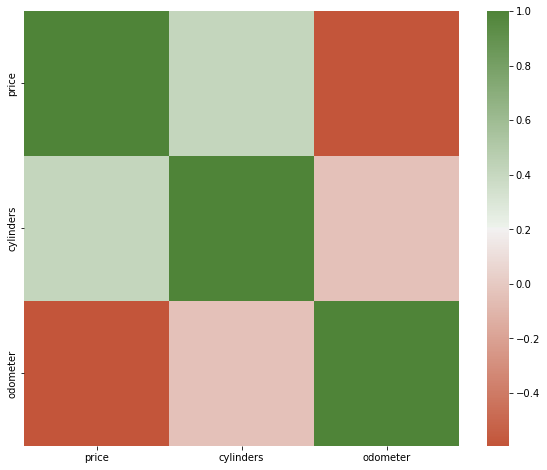

In [140]:
# Visual representation of correlation outputs using seaborn :

f, ax = plt.subplots(figsize=(10, 8))
corr = df_1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(20,120, as_cmap=True),
            square=True, ax=ax)
##### features are positively correlated with correlation value is below 0.50

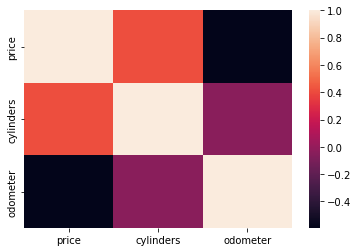

In [147]:
sns.heatmap(df_1.corr());

In [62]:
df_1.info

<bound method DataFrame.info of         price        year manufacturer  condition  cylinders fuel  odometer  \
0       15000  2013-01-01         ford  excellent          6  gas  128000.0   
1       27990  2012-01-01          gmc       good          8  gas   68696.0   
2       34590  2016-01-01    chevrolet       good          6  gas   29499.0   
3       35000  2019-01-01       toyota  excellent          6  gas   43000.0   
4       29990  2016-01-01    chevrolet       good          6  gas   17302.0   
...       ...         ...          ...        ...        ...  ...       ...   
103572  39990  2017-01-01     infiniti       good          8  gas   41664.0   
103573  32990  2016-01-01     infiniti       good          8  gas   55612.0   
103574  33590  2018-01-01        lexus       good          6  gas   30814.0   
103575  23590  2019-01-01       nissan       good          6  gas   32226.0   
103576  28990  2018-01-01        lexus       good          6  gas   30112.0   

       title_status

### Split Training and Testing Data

In [63]:
# Create features and target
X = df_1.copy().drop('price', axis=1)
X=pd.get_dummies(X)

# Create our target
y = df_1['price']

In [64]:
# Create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

### Loading Model

In [65]:
# Create a machine learning model
regr = DecisionTreeRegressor()

In [66]:
# Make an object pipe to create pipeline for regr
pipe = Pipeline(steps=[('regr',regr)])

In [67]:
# Set parameters as value list from which GridSearchCV will select best value
max_depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

In [68]:
# Create dictionary to set parameters
parameters = dict(regr__max_depth=max_depth)

In [69]:
# Create GridSearchCV object and fot dataset i.e., X and y
pred = GridSearchCV(pipe, parameters)
pred.fit(X, y)

GridSearchCV(estimator=Pipeline(steps=[('regr', DecisionTreeRegressor())]),
             param_grid={'regr__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                             12, 13, 14, 15]})

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [70]:
# Print result
print(); print(pred.best_estimator_.get_params()['regr'])


DecisionTreeRegressor(max_depth=15)


### Prediction on Testing Data

In [71]:
# Make prediction
best_regr = DecisionTreeRegressor(max_depth=11)
best_regr.fit(X_train, y_train)
y_pred_11 = best_regr.predict(X_test)

In [72]:
# Result evaluation
rscore = metrics.r2_score(y_test, y_pred_11)
rscore

0.7669479465360933

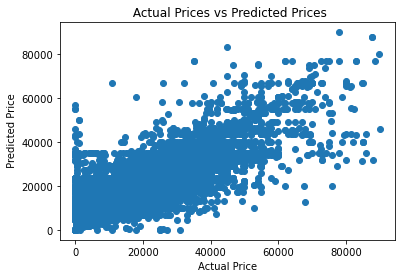

In [73]:
plt.scatter(y_test,y_pred_11)
plt.xlabel("Actual Price")
plt.ylabel(" Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

### Prediction On Testing Data

In [74]:
# Make prediction training 
best_regr = DecisionTreeRegressor(max_depth=11)
best_regr.fit(X_train, y_train)
y_train_pred_11 = best_regr.predict(X_train)

In [75]:
# Result evaluation
rscore = metrics.r2_score(y_train, y_train_pred_11)
rscore

0.7965891013034742

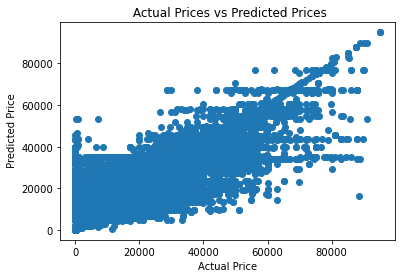

In [76]:
plt.scatter(y_train,y_train_pred_11)
plt.xlabel("Actual Price")
plt.ylabel(" Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

### DecisionTreeRegressor Model Evaluation: Max Depth 11

In [77]:
# Mean Square Error
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred_11),
                mean_squared_error(y_test, y_pred_11)))

MSE train: 34929045.388, test: 40600601.837


In [78]:
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred_11),
                r2_score(y_test, y_pred_11)))

R^2 train: 0.797, test: 0.767


### Test with max depth 10

In [79]:
# Test with max_depth 10
best_regr10 = DecisionTreeRegressor(max_depth=10)
best_regr.fit(X_train, y_train)
y_pred_10 = best_regr.predict(X_test)

In [80]:
rscore = metrics.r2_score(y_test, y_pred_10)
rscore

0.7677122737216013

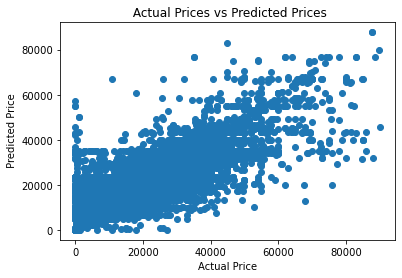

In [81]:
plt.scatter(y_test,y_pred_10)
plt.xlabel("Actual Price")
plt.ylabel(" Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [82]:
# Test with max_depth 10 training data
best_regr10 = DecisionTreeRegressor(max_depth=10)
best_regr.fit(X_train, y_train)
y_train_pred_10 = best_regr.predict(X_train)

In [83]:
rscore = metrics.r2_score(y_train, y_train_pred_10)
rscore

0.7965891013034742

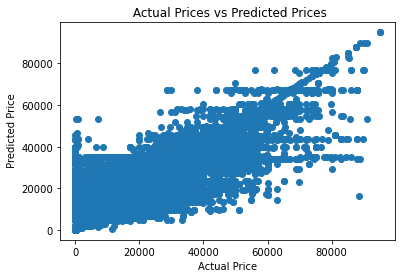

In [84]:
plt.scatter(y_train,y_train_pred_10)
plt.xlabel("Actual Price")
plt.ylabel(" Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

### DecisionTreeRegressor Model Evaluation: Max Depth 10

In [85]:
# Mean Square Error
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred_10),
                mean_squared_error(y_test, y_pred_10)))

MSE train: 34929045.388, test: 40467446.418


In [86]:
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred_10),
                r2_score(y_test, y_pred_10)))

R^2 train: 0.797, test: 0.768


# Linear Regression Model

### Data selection for Linear Regression Models

In [142]:
# Select columns for prediction with Linear Regression Model
df_2 = df.loc[:,['price', 'year', 'manufacturer', 
       'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'drive', 'type', 'area']]

C:\Users\shahl\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


<AxesSubplot:>

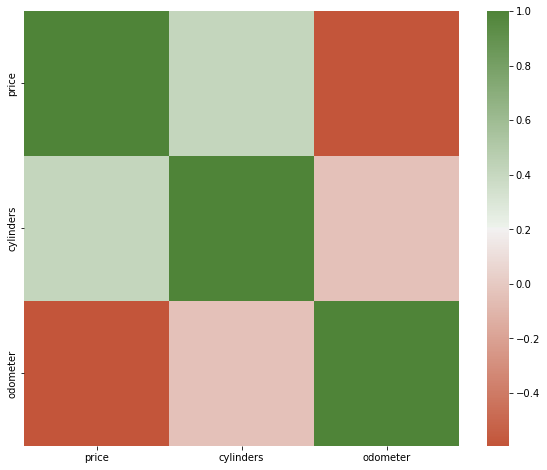

In [143]:
# Visual representation of correlation outputs using seaborn :

f, ax = plt.subplots(figsize=(10, 8))
corr = df_2.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(20,120, as_cmap=True),
            square=True, ax=ax)
# features are positively correlated with correlation value is below 0.50

In [ ]:
# # EDA on target variable
# sns.countplot(x='income', data=adult)  

### Data Transformation

In [137]:
# perform data transformation for Linear Regression Model
for col in df_2.columns[1:]:
    attName = col
    dType = df[col].dtype
    missing = pd.isnull(df[col]).any()
    uniqueCount = len(df[attName].value_counts(normalize=False))
# discretize (create dummies)
    if dType == object:
        df_2 = pd.concat([df_2, pd.get_dummies(df_2[col], prefix=col)], axis=1)
        del df_2[attName]

In [138]:
df_2.head()

,price,cylinders,odometer,year_2001-01-01,year_2002-01-01,year_2003-01-01,year_2004-01-01,year_2005-01-01,year_2006-01-01,year_2007-01-01,...,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,area_mw,area_ne,area_south,area_west
0,15000,6,128000.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,27990,8,68696.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,34590,6,29499.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,35000,6,43000.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,29990,6,17302.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


### Split Training and Testing Data

In [119]:
# Create features and target
X = df_2.copy().drop('price', axis=1)
X=pd.get_dummies(X)

# Create our target
y = df_2['price']

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= .1, random_state=2)

In [121]:
# Loadinf the Linear Regression model
lin_reg_model = LinearRegression()

In [122]:
#fitting data to the linear Regression model
lin_reg_model.fit(X_train, y_train)

LinearRegression()

In [123]:
# prediction on Testing data
y_test_pred = lin_reg_model.predict(X_test)

In [124]:
# Checking Accuracy
# R squared Error
error_score = metrics.r2_score(y_test, y_test_pred)
print("R Squared Error_score : ",error_score)

R Squared Error_score :  0.753026984617314


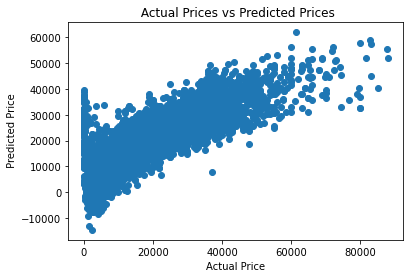

In [125]:
plt.scatter(y_test,y_test_pred)
plt.xlabel("Actual Price")
plt.ylabel(" Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [126]:
# prediction on Training data
y_train_pred = lin_reg_model.predict(X_train)

In [127]:
# R squared Error
error_score = metrics.r2_score(y_train, y_train_pred)
print("R Squared Error_score : ",error_score)

R Squared Error_score :  0.7571953794028752


In [128]:
# Result of prediction
data = {'price': y_train,
       'prediction': y_train_pred}
df_pred = pd.DataFrame(data)
df_pred

,price,prediction
9802,5975,4925.817926
7648,7738,8734.688404
57346,10500,9323.259828
70682,10995,8065.046444
101997,39995,31390.476265
...,...,...
44566,13999,17018.379972
95816,6895,10018.783069
72173,15800,21442.032086
100879,34590,31768.841207


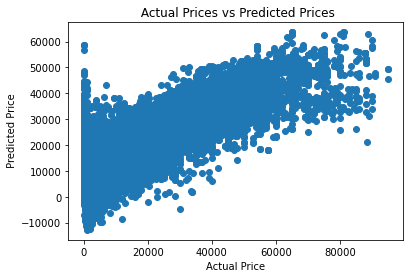

In [129]:
plt.scatter(y_train,y_train_pred)
plt.xlabel("Actual Price")
plt.ylabel(" Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [130]:
# Mean Square Error
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
                mean_squared_error(y_test, y_test_pred)))

MSE train: 41931245.347, test: 41773206.619


In [131]:
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),
                r2_score(y_test, y_test_pred)))

R^2 train: 0.757, test: 0.753
